## 时序图绘制

#### 1. 尝试绘制某一个合约的日收盘价时序图

In [57]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt


In [1]:
closeData = get_price('A1909.XDCE',start_date='2019-04-01',end_date='2019-07-22').close
closeData

2019-04-01    3411.0
2019-04-02    3427.0
2019-04-03    3437.0
2019-04-04    3429.0
2019-04-08    3431.0
2019-04-09    3426.0
2019-04-10    3423.0
2019-04-11    3415.0
2019-04-12    3405.0
2019-04-15    3433.0
2019-04-16    3434.0
2019-04-17    3420.0
2019-04-18    3414.0
2019-04-19    3425.0
2019-04-22    3412.0
2019-04-23    3415.0
2019-04-24    3420.0
2019-04-25    3406.0
2019-04-26    3364.0
2019-04-29    3370.0
2019-04-30    3378.0
2019-05-06    3397.0
2019-05-07    3396.0
2019-05-08    3415.0
2019-05-09    3468.0
2019-05-10    3456.0
2019-05-13    3459.0
2019-05-14    3516.0
2019-05-15    3529.0
2019-05-16    3543.0
               ...  
2019-06-11    3502.0
2019-06-12    3462.0
2019-06-13    3481.0
2019-06-14    3467.0
2019-06-17    3492.0
2019-06-18    3455.0
2019-06-19    3458.0
2019-06-20    3453.0
2019-06-21    3440.0
2019-06-24    3443.0
2019-06-25    3472.0
2019-06-26    3432.0
2019-06-27    3430.0
2019-06-28    3448.0
2019-07-01    3389.0
2019-07-02    3389.0
2019-07-03   

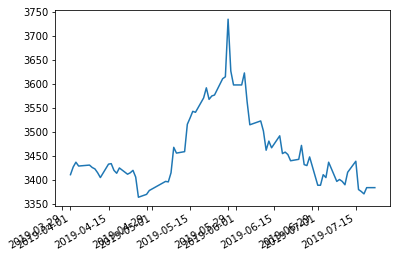

In [2]:
closeData.plot()

#### 2. 尝试绘制某一合约分钟收盘价数据

In [40]:
closeData = get_price('A1909.XDCE',start_date='2019-07-12',end_date='2019-07-22',frequency='1m').close
closeData

2019-07-12 09:01:00    3392.0
2019-07-12 09:02:00    3389.0
2019-07-12 09:03:00    3392.0
2019-07-12 09:04:00    3391.0
2019-07-12 09:05:00    3393.0
2019-07-12 09:06:00    3393.0
2019-07-12 09:07:00    3393.0
2019-07-12 09:08:00    3394.0
2019-07-12 09:09:00    3396.0
2019-07-12 09:10:00    3397.0
2019-07-12 09:11:00    3395.0
2019-07-12 09:12:00    3393.0
2019-07-12 09:13:00    3396.0
2019-07-12 09:14:00    3395.0
2019-07-12 09:15:00    3394.0
2019-07-12 09:16:00    3396.0
2019-07-12 09:17:00    3395.0
2019-07-12 09:18:00    3393.0
2019-07-12 09:19:00    3393.0
2019-07-12 09:20:00    3391.0
2019-07-12 09:21:00    3393.0
2019-07-12 09:22:00    3393.0
2019-07-12 09:23:00    3391.0
2019-07-12 09:24:00    3392.0
2019-07-12 09:25:00    3391.0
2019-07-12 09:26:00    3391.0
2019-07-12 09:27:00    3391.0
2019-07-12 09:28:00    3390.0
2019-07-12 09:29:00    3391.0
2019-07-12 09:30:00    3391.0
                        ...  
2019-07-19 22:31:00    3384.0
2019-07-19 22:32:00    3384.0
2019-07-19

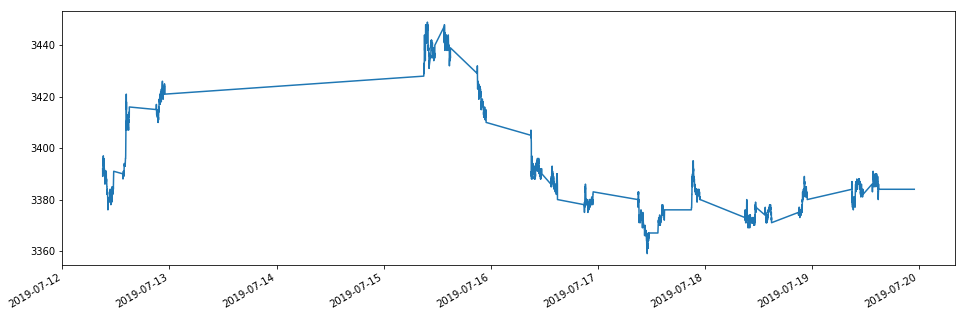

In [58]:
plt.figure(figsize=(16, 5.2))
ax=plt.subplot()
closeData.plot(ax=ax)

- 数据存在明显的问题，频率变高后，普通的时序图会将周六日非交易日数据也加载进来
### 3. 尝试解决跨日期绘制时序图的问题

In [79]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
def plotData(data,title=''):
    def format_date(x,pos=None):
        if x<0 or x>len(date_tickers)-1:
            return ''
        return date_tickers[int(x)]
    plt.figure(figsize=(16, 5.2))
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 解决中文显示乱码的问题
    date_tickers=data.index.tolist()
    newData=data.copy()
    newData.index=range(newData.size)
    ax=plt.subplot()
    ax.xaxis.set_major_formatter(FuncFormatter(format_date))
    newData.plot(ax=ax,title=title)

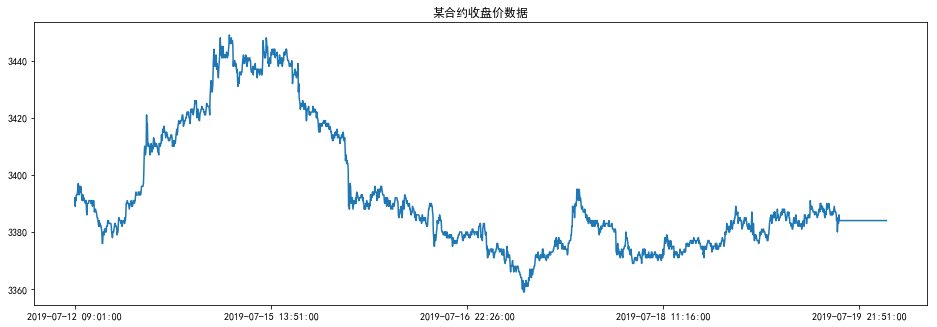

In [78]:
plotData(closeData,title='某合约收盘价数据')